# Part3 : Database exploration, analysis and modeling 

#### The difference between MEG and EEG ? 
- Electro-encephalography (EEG) and magneto-encephalography (MEG) are functional imaging methods used to measure brain activity directly and non-invasively (from outside the head). 

- EEG detects synchronised electrical activity of large groups of neurons, whereas MEG detects the tiny changes in magnetic fields that this electrical activity is associated with. 

- The images produced by EEG and MEG are not very localised, but they can monitor how electrical activity changes with time very precisely.

- EEG requires electrodes to be attached to the scalp. It can be used to detect general patterns of electrical activity, such as the brain waves that occur during sleep. 

- Researchers used EEG to compare the visual cortex activity of people who are born blind with those who are not blind, and they found that the visual cortex of blind people was active. 

- EEG can also be used to detect electrical signals associated with specific sensory stimuli, thought processes or movements.

https://bigpictureeducation.com/eeg-and-meg

## Description : 
what is project plan ? 
 1. explorer the data
 2. data vis 
 2. clean the data 
 3. data analysis 
 4. data modeling 

#### what is this sample what is contain ? 
-The sample from one single .edf file from patient. it contain the non-seizure and seizure 

#### sample informaiton:
### chb03-01 
##### File Name: chb03_01.edf
##### File Start Time: 13:23:36
##### File End Time: 14:23:36
##### Number of Seizures in File: 1
##### Seizure Start Time: 362 seconds
##### Seizure End Time: 414 seconds
**********************


enviroment of this workplace : 

In [1]:
!conda info --envs

# conda environments:
#
base                  *  /anaconda3
python27                 /anaconda3/envs/python27



1. import library 

In [2]:
# this will filter out a lot of future warnings from statsmodels
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import statsmodels.api as sm
import os

sns.set(font_scale=1.5)
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [4]:
import numpy as np
from scipy.io import loadmat
import mne

In [5]:
%matplotlib qt5

In [6]:
from mne import Epochs, pick_types, events_from_annotations
from mne.channels import read_layout
from mne.io import concatenate_raws, read_raw_edf
from mne.datasets import eegbci
from mne.decoding import CSP
from mne.datasets import sample

#### MNE
MNE is a Python package for EEG/MEG processing. It offers a wide variety of useful tools including input/output, filtering, independent component analysis (ICA), forward modeling, inverse solutions, time-frequency decompositions, visualization, and more. EEG data was loaded from MIT database, now i will view and edit associated meta information.

In [7]:
raw = mne.io.read_raw_edf("/Volumes/Transcend/chb-mit-scalp-eeg-database-1.0.0/chb03/chb03_01.edf", preload=True)

Extracting EDF parameters from /Volumes/Transcend/chb-mit-scalp-eeg-database-1.0.0/chb03/chb03_01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


<ipython-input-7-4681b3f2aa00>:1: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf("/Volumes/Transcend/chb-mit-scalp-eeg-database-1.0.0/chb03/chb03_01.edf", preload=True)


#### what is 10-20 system ? 
1. is an internationally reconized method that allow eeg electrode placement to be standardised.
2. ensure that inter-electrode is sapcing is equal 
3. electrode placements proportional to skull size and shape 
4. covers all brain regions F = Frontal , P = Parietal , T = Temporal , O = Occipital 
5. numbering system: Odd = left side , Even = right side, Z = midline 
6. it has 23 channel

Data Sampling Rate: 256 Hz
*************************

Channels in EDF Files:
**********************
- Channel 1: FP1-F7
- Channel 2: F7-T7
- Channel 3: T7-P7
- Channel 4: P7-O1
- Channel 5: FP1-F3
- Channel 6: F3-C3
- Channel 7: C3-P3
- Channel 8: P3-O1
- Channel 9: FP2-F4
- Channel 10: F4-C4
- Channel 11: C4-P4
- Channel 12: P4-O2
- Channel 13: FP2-F8
- Channel 14: F8-T8
- Channel 15: T8-P8
- Channel 16: P8-O2
- Channel 17: FZ-CZ
- Channel 18: CZ-PZ
- Channel 19: P7-T7
- Channel 20: T7-FT9
- Channel 21: FT9-FT10
- Channel 22: FT10-T8
- Channel 23: T8-P8



#### what is montage ? 
each EEG trace is generated from an active and a reference electrode. different patterns of electrodes are selected and the traces goruped to provide data from different areas of the scalp.

In [8]:
mne.channels.get_builtin_montages()

['EGI_256',
 'GSN-HydroCel-128',
 'GSN-HydroCel-129',
 'GSN-HydroCel-256',
 'GSN-HydroCel-257',
 'GSN-HydroCel-32',
 'GSN-HydroCel-64_1.0',
 'GSN-HydroCel-65_1.0',
 'biosemi128',
 'biosemi16',
 'biosemi160',
 'biosemi256',
 'biosemi32',
 'biosemi64',
 'easycap-M1',
 'easycap-M10',
 'mgh60',
 'mgh70',
 'standard_1005',
 'standard_1020',
 'standard_alphabetic',
 'standard_postfixed',
 'standard_prefixed',
 'standard_primed']

In [9]:
mne.set_log_level("WARNING")

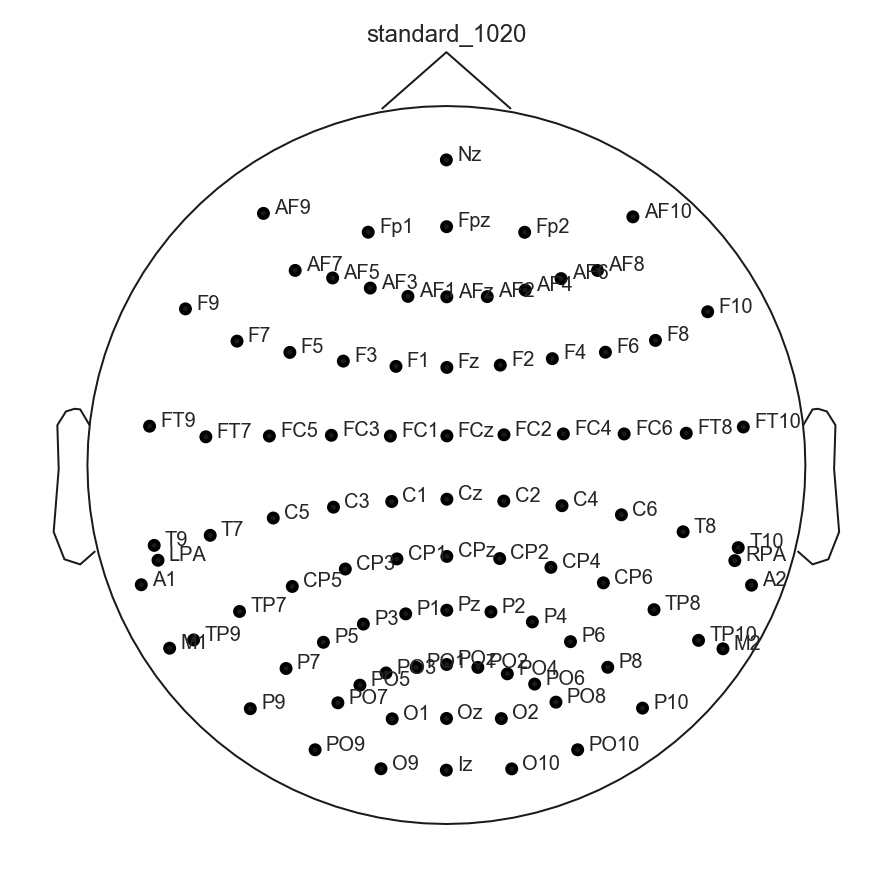

In [10]:
montage = mne.channels.read_montage("standard_1020")
montage.plot()

#### Visualization 

In [11]:
raw.info["sfreq"]

256.0

In [12]:
from datetime import datetime
datetime.utcfromtimestamp(raw.info["meas_date"][0])

datetime.datetime(1975, 9, 2, 13, 23, 36)

In [13]:
raw.set_eeg_reference("average")

<RawEDF  |  chb03_01.edf, n_channels x n_times : 23 x 921600 (3600.0 sec), ~161.8 MB, data loaded>

In [14]:
print(raw.info)

<Info | 16 non-empty fields
    bads : list | 0 items
    ch_names : list | FP1-F7, F7-T7, T7-P7, P7-O1, FP1-F3, F3-C3, C3-P3, ...
    chs : list | 23 items (EEG: 23)
    comps : list | 0 items
    custom_ref_applied : bool | True
    dev_head_t : Transform | 3 items
    events : list | 0 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 128.0 Hz
    meas_date : tuple | 1975-09-02 13:23:36 GMT
    nchan : int | 23
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 256.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    dig : NoneType
    experimenter : NoneType
    file_id : NoneType
    gantry_angle : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_name : NoneType
    subject_info : NoneType
    xplotter_la

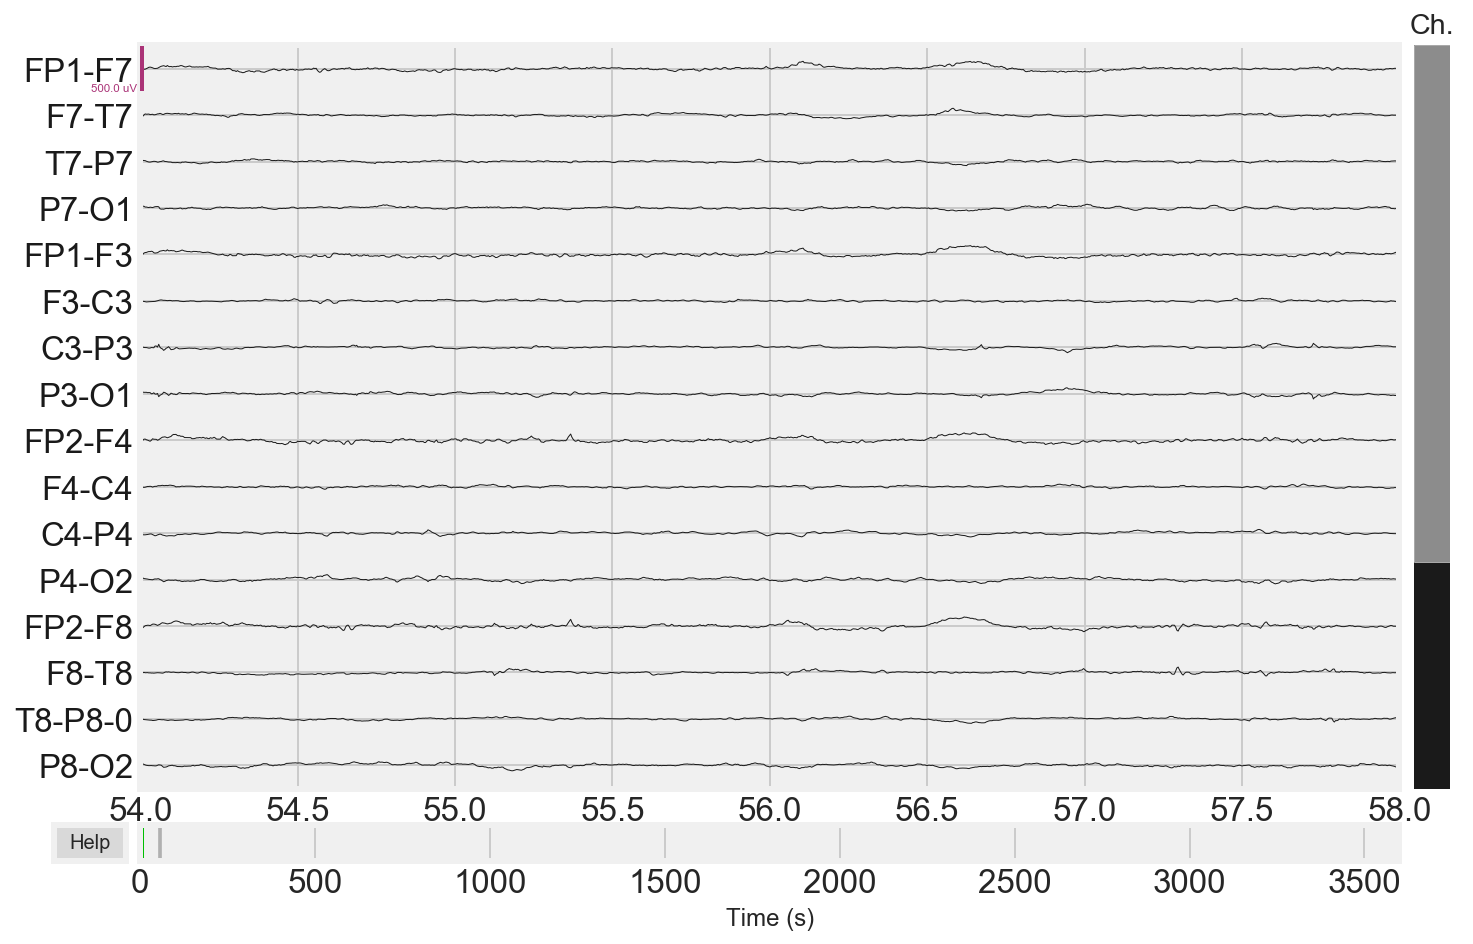

In [15]:
raw.plot(n_channels=16, start=54, duration=4,
          scalings=dict(eeg=250e-6, eog=750e-6))

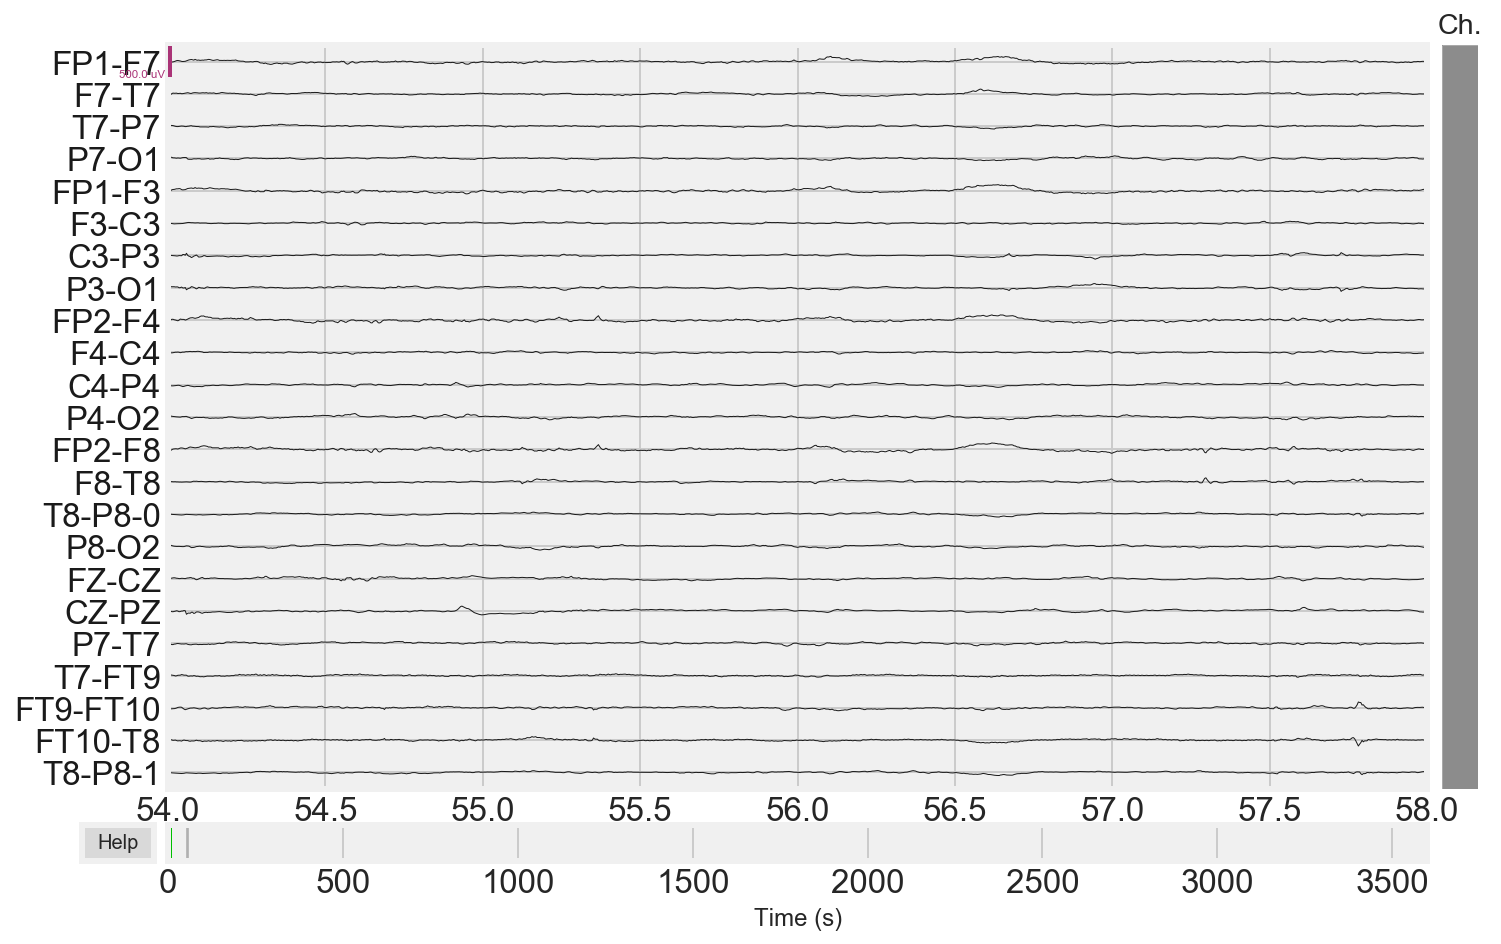

In [16]:
raw.plot(n_channels=25, start=54, duration=4,
          scalings=dict(eeg=250e-6, eog=750e-6))

In [17]:
import matplotlib.pyplot as plt
plt.plot(raw._data[-1])
print(plt.plot(raw._data[-1]))

2. read the dataframe

The data extraction was performed in different enviroment python2.7. therefore, the work for this project was separated due to enviroment differences.

In [18]:
df1 = pd.read_csv('/Volumes/Transcend/chb-mit-scalp-eeg-database-1.0.0/chb03/chb03_01.edf.csv')

In [19]:
df1.head()

,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,F8-T8,T8-P8,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8.1
0,42.002442,19.340659,6.056166,-14.261294,31.062271,-16.996337,33.406593,5.665446,0.19536,-48.644689,...,-9.96337,2.148962,-6.056166,-23.247863,26.764347,-5.665446,-5.665446,-10.35409,-13.089133,2.148962
1,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.19536,0.195360,...,0.19536,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.19536,0.195360,0.195360
2,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.19536,0.195360,...,0.19536,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.19536,0.195360,0.195360
3,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.19536,0.195360,...,0.19536,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.19536,0.195360,0.195360
4,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.19536,0.195360,...,0.19536,0.195360,0.195360,0.195360,0.195360,0.195360,-0.195360,0.19536,0.195360,0.195360


In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 921600 entries, 0 to 921599
Data columns (total 23 columns):
FP1-F7      921600 non-null float64
F7-T7       921600 non-null float64
T7-P7       921600 non-null float64
P7-O1       921600 non-null float64
FP1-F3      921600 non-null float64
F3-C3       921600 non-null float64
C3-P3       921600 non-null float64
P3-O1       921600 non-null float64
FP2-F4      921600 non-null float64
F4-C4       921600 non-null float64
C4-P4       921600 non-null float64
P4-O2       921600 non-null float64
FP2-F8      921600 non-null float64
F8-T8       921600 non-null float64
T8-P8       921600 non-null float64
P8-O2       921600 non-null float64
FZ-CZ       921600 non-null float64
CZ-PZ       921600 non-null float64
P7-T7       921600 non-null float64
T7-FT9      921600 non-null float64
FT9-FT10    921600 non-null float64
FT10-T8     921600 non-null float64
T8-P8.1     921600 non-null float64
dtypes: float64(23)
memory usage: 161.7 MB


In [21]:
date=pd.date_range(start='13:23:36',end='14:23:36',periods=921600)

In [22]:
df1.index=date

In [23]:
df1.head()

,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,F8-T8,T8-P8,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8.1
2019-09-12 13:23:36.000000000,42.002442,19.340659,6.056166,-14.261294,31.062271,-16.996337,33.406593,5.665446,0.19536,-48.644689,...,-9.96337,2.148962,-6.056166,-23.247863,26.764347,-5.665446,-5.665446,-10.35409,-13.089133,2.148962
2019-09-12 13:23:36.003906254,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.19536,0.195360,...,0.19536,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.19536,0.195360,0.195360
2019-09-12 13:23:36.007812508,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.19536,0.195360,...,0.19536,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.19536,0.195360,0.195360
2019-09-12 13:23:36.011718762,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.19536,0.195360,...,0.19536,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.19536,0.195360,0.195360
2019-09-12 13:23:36.015625016,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.19536,0.195360,...,0.19536,0.195360,0.195360,0.195360,0.195360,0.195360,-0.195360,0.19536,0.195360,0.195360


In [24]:
start=str((df1.head(1).index.values+pd.Timedelta(seconds=362))[0])

In [25]:
end=str((df1.head(1).index.values+pd.Timedelta(seconds=414))[0])

In [26]:
# import numpy as np
# target=np.zero

In [27]:
df1['target']=0

In [28]:
df=df1.loc[:end]

In [29]:
target=df.target
target.loc[start:end]=1
target.loc[start:end].head()

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


2019-09-12 13:29:38.000392795    1
2019-09-12 13:29:38.004299049    1
2019-09-12 13:29:38.008205304    1
2019-09-12 13:29:38.012111558    1
2019-09-12 13:29:38.016017812    1
Name: target, dtype: int64

In [30]:
df.target=target
df.target.value_counts()

/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


0    92672
1    13568
Name: target, dtype: int64

In [31]:
df.iloc[78672:].target.value_counts()

0    14000
1    13568
Name: target, dtype: int64

In [32]:
df_final=df.iloc[78672:].copy()

In [33]:
df_final.target.value_counts()

0    14000
1    13568
Name: target, dtype: int64

In [66]:
X = df_final.drop('target',axis=1)
y = df_final.target

#### Train/Test Split

In [67]:
from numbers import Number
from scipy import stats

In [68]:
# do the independent component analysis 
from sklearn.datasets import load_digits
from sklearn.decomposition import FastICA
from sklearn import svm
import numpy as np
import glob
import os
from PIL import Image
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

I tried to use ICA to remove and reduce the database however, it did not work . 
Independent Component Analysis is a signal processing method to separate independent sources linearly mixed in several sensors. For instance, when recording electroencephalograms (EEG) on the scalp, ICA can separate out artifacts embedded in the data (since they are usually independent of each other).I did visualization show the ICA and PCA 

In [44]:
#ica = FastICA(max_iter=4000)
#X_train = ica.fit_transform(X)
#X_test = ica.transform(X)

In [54]:
# from sklearn.decomposition import FastICA
# # ica = FastICA(max_iter=4000)
# # X_train = ica.fit_transform(X)
# # X_test = ica.transform(X)
# ica = FastICA(n_components=23,max_iter=300)
# # icaSignal = X.ica.fit_transform(raw.signal)
# X_train = ica.fit_transform(X)
# X_test = ica.transform(X)

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

from sklearn.decomposition import FastICA, PCA

# #############################################################################
# Generate sample data
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
s3 = signal.sawtooth(2 * np.pi * time)  # Signal 3: saw tooth signal

S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)  # Add noise

S /= S.std(axis=0)  # Standardize data
# Mix data
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])  # Mixing matrix
X = np.dot(S, A.T)  # Generate observations

# Compute ICA
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

# We can `prove` that the ICA model applies by reverting the unmixing.
assert np.allclose(X, np.dot(S_, A_.T) + ica.mean_)

# For comparison, compute PCA
pca = PCA(n_components=3)
H = pca.fit_transform(X)  # Reconstruct signals based on orthogonal components

# #############################################################################
# Plot results

plt.figure()

models = [X, S, S_, H]
names = ['Observations (mixed signal)',
         'True Sources',
         'ICA recovered signals',
         'PCA recovered signals']
colors = ['red', 'steelblue', 'orange']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.46)
plt.show()

In [72]:
X.shape

(27568, 23)

In [73]:
y.shape

(27568,)

#### preprocess data for machine learning

In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

In [75]:
ica=FastICA()
X_train=ica.fit_transform(X_train)
X_test=ica.fit_transform(X_test)

In [59]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Modeling 

our data was identified as classification datasets 

1. logistic regression 

In [76]:
#import the model 
from sklearn.linear_model import LogisticRegression

In [77]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred_log_reg = clf.predict(X_test)
acc_log_reg = round(clf.score(X_train, y_train) * 100, 2)
print (str(acc_log_reg) + ' %')

54.57 %


In [114]:
acc_log_reg_T = round(clf.score(X_test, y_test) * 100, 2)
print (str(acc_log_reg_T) + ' %')

56.26 %


2. random forest classifier


In [78]:
# classifier
from sklearn.ensemble import RandomForestClassifier

In [79]:
random_forest = RandomForestClassifier(n_estimators=100, max_depth = 40, random_state= 0)
random_forest.fit(X_train, y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) ,2)
print(Y_prediction)

[1 1 0 ... 1 1 1]


In [80]:
acc_random_forest = round(random_forest.score(X_train, y_train) ,2)
print (str(acc_random_forest) + ' %')

1.0 %


In [113]:
acc_random_forest_T = round(random_forest.score(X_test, y_test) ,2)
print (str(acc_random_forest_T) + ' %')

0.56 %


2. Support vector machine 

In [81]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train)
y_pred_svc = clf.predict(X_test)
acc_svc = round(clf.score(X_train, y_train) * 100, 2)
print (str(acc_svc) + '%')

50.64%


In [112]:
acc_svc_T = round(clf.score(X_test, y_test) * 100, 2)
print (str(acc_svc_T) + '%')

56.26%


3. linear support vector machine 

In [82]:
from sklearn.svm import SVC, LinearSVC
clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred_linear_svc = clf.predict(X_test)
acc_linear_svc = round(clf.score(X_train, y_train) * 100, 2)
print (str(acc_linear_svc) + '%')

53.78%


In [111]:
acc_linear_svc_T = round(clf.score(X_test, y_test) * 100, 2)
print (str(acc_linear_svc_T) + '%')

56.26%


4. K Neighbors classifier 

In [83]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
y_pred_knn = clf.predict(X_test)
acc_knn = round(clf.score(X_train, y_train) * 100, 2)
print (str(acc_knn)+'%')

97.44%


In [110]:
acc_knn_T = round(clf.score(X_test, y_test) * 100, 2)
print (str(acc_knn_T)+'%')

56.26%


5. Gaussian NB 

In [84]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred_gnb = clf.predict(X_test)
acc_gnb = round(clf.score(X_train, y_train) * 100, 2)
print (str(acc_gnb) + '%')

97.77%


In [109]:
acc_gnb_T = round(clf.score(X_test, y_test) * 100, 2)
print (str(acc_gnb_T) + '%')

56.26%


6. Artifical Neural Network 

In [85]:
#Importing keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [86]:
classifier = Sequential()

W0912 13:44:02.691244 140735527912320 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [87]:
classifier.add(Dense(output_dim = 80, init = 'uniform', activation = 'relu', input_dim = X_train.shape[1]))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=23, units=80, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.
W0912 13:44:13.143333 140735527912320 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0912 13:44:13.650055 140735527912320 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [88]:
classifier.add(Dense(output_dim = 23, init = 'uniform', activation = 'relu'))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=23, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


In [89]:
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


In [90]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#Fitting the ANN to the training set
classifier.fit(X_train, y_train, batch_size = 1, nb_epoch = 100)

W0912 13:44:43.965089 140735527912320 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0912 13:44:44.035544 140735527912320 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3657: The name tf.log is deprecated. Please use tf.math.log instead.

W0912 13:44:44.042814 140735527912320 deprecation.py:323] From /anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.
W0912 13:44:4

Epoch 1/100
22054/22054 [==============================] - 50s 2ms/step - loss: 0.4207 - acc: 0.7827
Epoch 2/100
22054/22054 [==============================] - 47s 2ms/step - loss: 0.0457 - acc: 0.9872: 1s 
Epoch 3/100
22054/22054 [==============================] - 48s 2ms/step - loss: 0.0333 - acc: 0.9893
Epoch 4/100
22054/22054 [==============================] - 36s 2ms/step - loss: 0.0301 - acc: 0.9905
Epoch 5/100
22054/22054 [==============================] - 27s 1ms/step - loss: 0.0250 - acc: 0.9922
Epoch 6/100
22054/22054 [==============================] - 26s 1ms/step - loss: 0.0236 - acc: 0.9925
Epoch 7/100
22054/22054 [==============================] - 27s 1ms/step - loss: 0.0228 - acc: 0.9930
Epoch 8/100
22054/22054 [==============================] - 27s 1ms/step - loss: 0.0211 - acc: 0.9933
Epoch 9/100
22054/22054 [==============================] - 27s 1ms/step - loss: 0.0204 - acc: 0.9934
Epoch 10/100
22054/22054 [==============================] - 27s 1ms/step - loss: 0.019

22054/22054 [==============================] - 30s 1ms/step - loss: 0.0055 - acc: 0.9981
Epoch 81/100
22054/22054 [==============================] - 30s 1ms/step - loss: 0.0061 - acc: 0.9979
Epoch 82/100
22054/22054 [==============================] - 30s 1ms/step - loss: 0.0058 - acc: 0.9981
Epoch 83/100
22054/22054 [==============================] - 30s 1ms/step - loss: 0.0051 - acc: 0.9983
Epoch 84/100
22054/22054 [==============================] - 30s 1ms/step - loss: 0.0067 - acc: 0.9979
Epoch 85/100
22054/22054 [==============================] - 29s 1ms/step - loss: 0.0059 - acc: 0.9981
Epoch 86/100
22054/22054 [==============================] - 28s 1ms/step - loss: 0.0053 - acc: 0.9984
Epoch 87/100
22054/22054 [==============================] - 30s 1ms/step - loss: 0.0047 - acc: 0.9982
Epoch 88/100
22054/22054 [==============================] - 30s 1ms/step - loss: 0.0058 - acc: 0.9980
Epoch 89/100
22054/22054 [==============================] - 30s 1ms/step - loss: 0.0062 - acc: 

In [91]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
acc_ANN = round(clf.score(X_train, y_train) * 100, 2)
print (str(acc_ANN) + '%')

97.77%


In [108]:
acc_ANN_T = round(clf.score(X_test, y_test) * 100, 2)
print (str(acc_ANN_T) + '%')

56.26%


In [92]:
acc_ica =(X_train, y_train)
print (str(acc_ica) + '%')

(array([[ 9.11044233e-03,  4.29674856e-03, -9.47788184e-03, ...,
        -4.01934133e-03,  1.58660361e-03,  2.53231408e-03],
       [ 6.00193381e-03, -9.05995802e-03,  6.33739162e-03, ...,
        -2.88746805e-04,  3.30639173e-03,  1.62251904e-02],
       [ 1.24940582e-03, -9.96912483e-06, -1.62581366e-04, ...,
        -2.42326322e-04, -7.01955766e-04,  1.70815599e-03],
       ...,
       [-1.15692293e-04, -1.14294054e-04,  4.46738321e-03, ...,
         1.24866113e-03, -2.83309351e-03, -2.14541361e-03],
       [-8.90474610e-03,  8.19391062e-03,  2.35185854e-02, ...,
         3.60237743e-03, -1.09358688e-03,  1.09456251e-02],
       [-1.58065854e-02, -1.14319470e-02,  7.39767936e-03, ...,
        -2.63329598e-03, -4.50263038e-03,  9.45109984e-03]]), 2019-09-12 13:30:00.117604294    1
2019-09-12 13:29:53.445722054    1
2019-09-12 13:28:58.875350342    0
2019-09-12 13:28:59.973007783    0
2019-09-12 13:30:21.527783775    1
2019-09-12 13:28:56.519879036    0
2019-09-12 13:29:59.160572005  

In [107]:
models = pd.DataFrame({'Model': ['Logistic Regression','Random Forest' ,'Support Vector Machines','LinearSVC', 
              'KNeighborsClassifier', 'GaussianNB','ANN'],'Train Score': [acc_log_reg, acc_random_forest , acc_svc, acc_linear_svc ,acc_knn, acc_gnb, acc_ANN]})

models.sort_values(by='Train Score', ascending=False)

,Model,Train Score
5,GaussianNB,97.77
4,KNeighborsClassifier,97.44
6,ANN,56.26
0,Logistic Regression,54.57
3,LinearSVC,53.78
2,Support Vector Machines,50.64
1,Random Forest,1.00


In [115]:
models_T = pd.DataFrame({'Model': ['Logistic Regression','Random Forest' ,'Support Vector Machines','LinearSVC', 
              'KNeighborsClassifier', 'GaussianNB','ANN'],'Test Score': [acc_log_reg_T, acc_random_forest_T , acc_svc_T, acc_linear_svc_T ,acc_knn_T, acc_gnb_T, acc_ANN_T]})

models_T.sort_values(by='Test Score', ascending=False)

,Model,Test Score
0,Logistic Regression,56.26
2,Support Vector Machines,56.26
3,LinearSVC,56.26
4,KNeighborsClassifier,56.26
5,GaussianNB,56.26
6,ANN,56.26
1,Random Forest,0.56


in conclusion : the logistic regression, linearSVC and ANN models were perfomred better than the others models . next step we use the regularization to overcome the over balance becuase the test test showed that there is over balanced .   

In [116]:
# from braindecode.datautil.signal_target import SignalAndTarget
# from braindecode.datautil.splitters import split_into_two_sets

In [117]:
# from braindecode.models.shallow_fbcsp import ShallowFBCSPNet
# from braindecode.models.deep4 import Deep4Net
# from torch import nn
# from braindecode.torch_ext.util import set_random_seeds
# from braindecode.models.util import to_dense_prediction_model

# # Set if you want to use GPU
# # You can also use torch.cuda.is_available() to determine if cuda is available on your machine.
# cuda = True
# #torch.cuda.is_available()
# set_random_seeds(seed=20170629, cuda=cuda)

# # This will determine how many crops are processed in parallel
# input_time_length = 1200
# n_classes = 2
# in_chans = 23
# # final_conv_length determines the size of the receptive field of the ConvNet
# #model = ShallowFBCSPNet(in_chans=in_chans, n_classes=n_classes, input_time_length=input_time_length,
# #                        final_conv_length=12).create_network()
# model = Deep4Net(in_chans=23, n_classes=n_classes, input_time_length=input_time_length,
#                 final_conv_length=2, stride_before_pool=True).create_network()
# to_dense_prediction_model(model)

# if cuda:
#     model.cuda()

In [118]:
# import numpy as np
# from braindecode.datautil.signal_target import SignalAndTarget
# # Convert data from volt to millivolt
# # Pytorch expects float32 for input and int64 for labels.

# X = (epoched.get_data() * 1e6).astype(np.float32)
# y = (epoched.events[:,2] - 2).astype(np.int64) #2,3 -> 0,1

# train_set = SignalAndTarget(X[:40], y=y[:40])
# valid_set = SignalAndTarget(X[40:70], y=y[40:70])

this is the next step that i should do next after regulization 

## Conclusion and future work : 


1. continue working on this project 
2. trying to understand CNN in neuroscience field 
3. develop machine learning for seizures 